In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

class Perceptron(object):

    def __init__(self, eta=0.1,  n_iter=10):
        self.eta = eta #taxa de aprendizado
        self.n_iter = n_iter #numero de treinamentos

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [0]:
from pandas import DataFrame
df = np.random.rand(20,4)
df = DataFrame(df)
df

,0,1,2,3
0,0.187236,0.359003,0.507797,0.988476
1,0.993591,0.809708,0.551992,0.639853
2,0.891554,0.302338,0.760691,0.205093
3,0.683630,0.084997,0.283725,0.080521
4,0.520223,0.862909,0.802592,0.202658
5,0.800221,0.719795,0.908928,0.821661
6,0.080449,0.958258,0.921358,0.869556
7,0.173537,0.240857,0.084107,0.300497
8,0.379411,0.001318,0.493569,0.146595
9,0.912706,0.166390,0.493364,0.644350


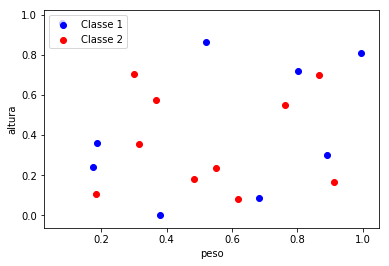

In [0]:
y = df.iloc[0:19, 2].values
#y = np.where(y == x2, 0.0,1.0)
X = df.iloc[0:19, [0,1]].values
plt.scatter(X[:9,0],X[:9,1],color='blue',marker='o',label='Classe 1')
plt.scatter(X[9:19,0],X[9:19,1],color='red',marker='o',label='Classe 2')
plt.xlabel('peso')
plt.ylabel('altura')
plt.legend(loc='upper left')
plt.show()

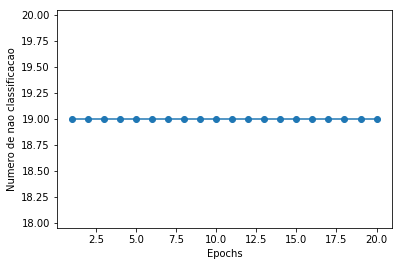

In [0]:
ppn = Perceptron(eta=0.1, n_iter=20)
X = np.array(X)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Numero de nao classificacao')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

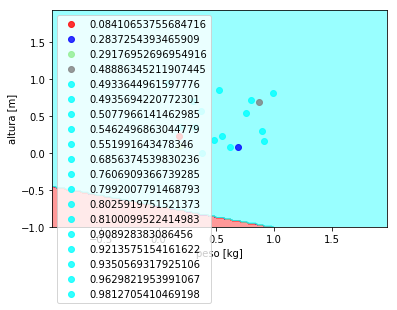

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   label=cl)

plt.c = [1]
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('peso [kg]')
plt.ylabel('altura [m]')
plt.legend(loc='upper left')
plt.show()

In [0]:
weights = np.random.rand(1,3)
weights

array([[0.10857496, 0.60063428, 0.91036919]])